# Guideline :
We will first clean the dataset in order to have a suitable one to work with, then we will try to predict the y_labels.

During the lab sessions, we have seen different regression techniques :
- Linear regression using gradient descent
- Linear regression using stochastic gradient descent
- Least squares regression using normal equations
- Ridge regression using normal equations
- Logistic regression using gradient descent or SGD
- Regularized logistic regression using gradient descent or SGD

In order to determine which technique is the best for our data model, for each one we will:
- test the regression model on the data
- compute the training and test accuracy with RMSE
- determine how stable our model fit to the data, using the average, the mean, the min and max accuracy.

Finally, we will select afterwards the best model with the right parameters, and use this model to predict the y_label values in the given csv file for us to complete.

In [1]:
import sys
sys.path.insert(0, 'scripts')
from implementations import *
from model_selection import *
from visualization import *
from helpers_us import *
from proj1_helpers import *

## 1. Data preprocessing

In [2]:
y, X, X_mean, X_std, ids = process_data('Data/train.csv', inv_log=True)

In [3]:
inital_w = np.zeros(X.shape[1])

## 2. Regression Techniques


### 2.1 Linear regression using gradient descent

IntProgress(value=0, max=30)

REMSE test:  0.8064956323854213
Accuracy:  76.4212


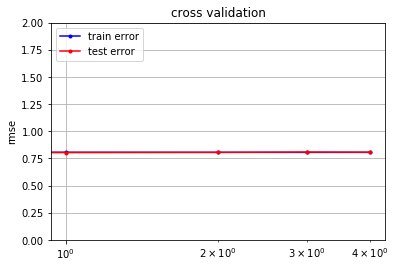

In [21]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares_GD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)

### 2.2. Linear regression using stochastic gradient descent

IntProgress(value=0, max=30)

REMSE test:  0.8105668995146068
Accuracy:  76.0628


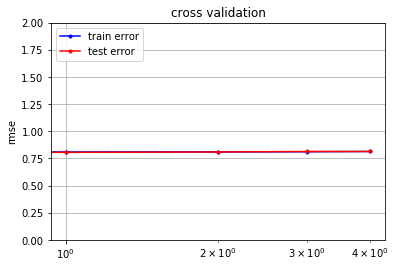

In [22]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares_SGD, initial_w=inital_w, max_iters=max_iters, gamma=gamma)

### 2.3. Least squares regression using normal equations

IntProgress(value=0, max=30)

REMSE test:  0.798092785153416
Accuracy:  77.5436


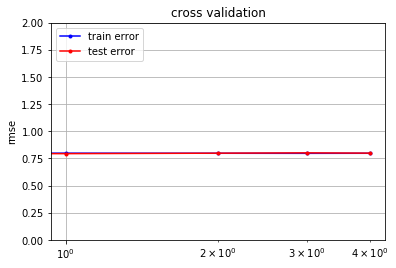

In [23]:
gamma = 0.01
max_iters = 500
cross_validation_demo(y, X, least_squares)

### 2.4. Ridge regression

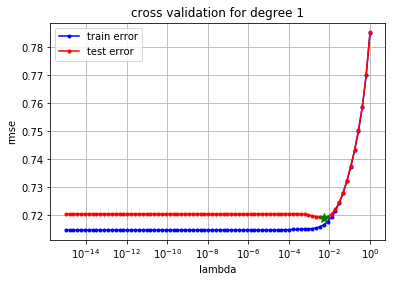

0.00526646239348428 0.719248827634385


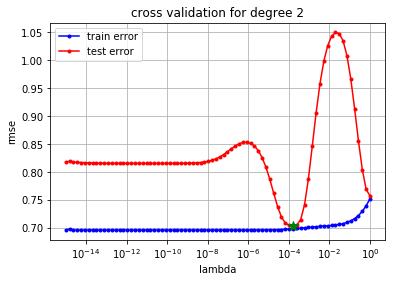

0.0001594159037456003 0.7033695153519752


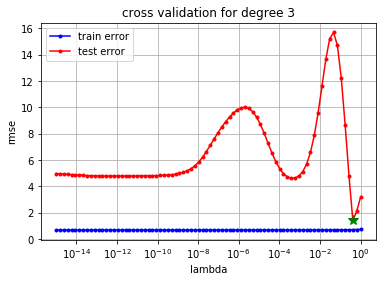

0.4171124612056533 1.4299148262267687


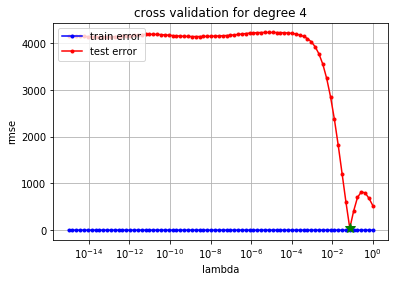

0.07257039612324231 40.48537932935358


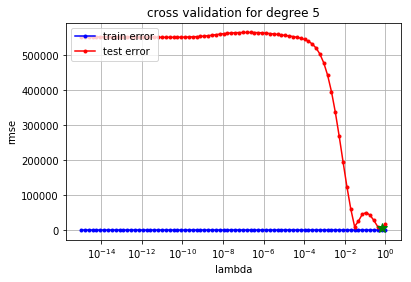

0.6458424430196992 5692.580778334504


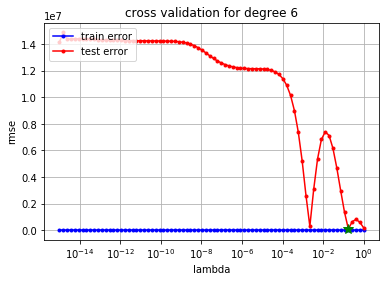

0.17398280529303695 81257.56419451987
Accuracy:  83.19087178460614
2 0.0001594159037456003


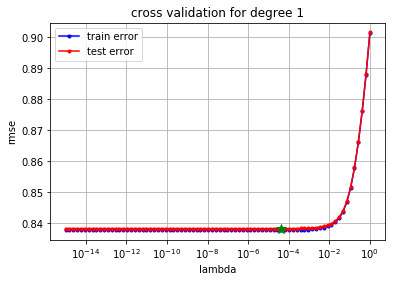

4.2944879887892724e-05 0.8382120399932574


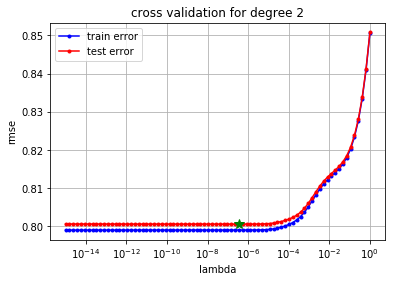

3.50190046143172e-07 0.80058753567393


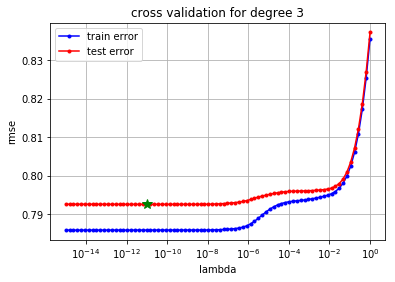

9.712740198471168e-12 0.792556978500524


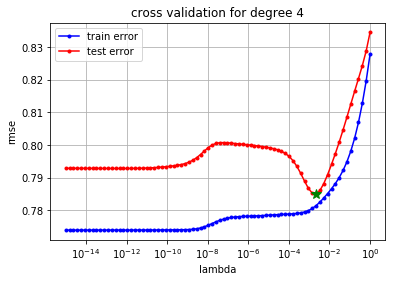

0.0021967070907932353 0.7850033630963213


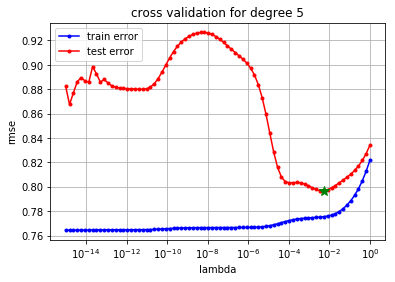

0.00526646239348428 0.7969169149538778


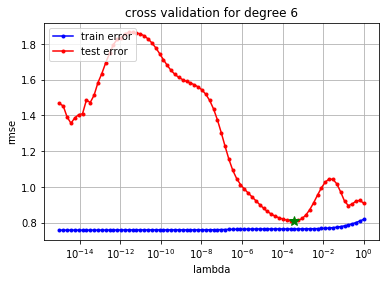

0.00038218926206331306 0.8092107618507608
Accuracy:  79.2210472014444
4 0.0021967070907932353


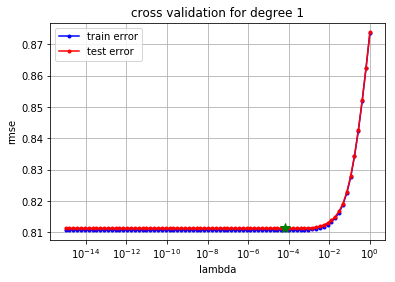

6.64943599666506e-05 0.8113086038001731


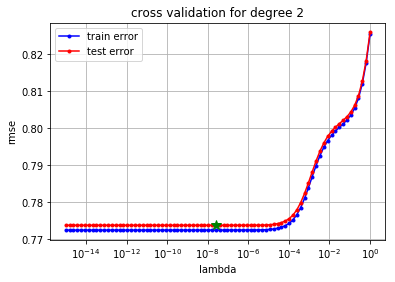

2.5413430367026393e-08 0.7737465136113117


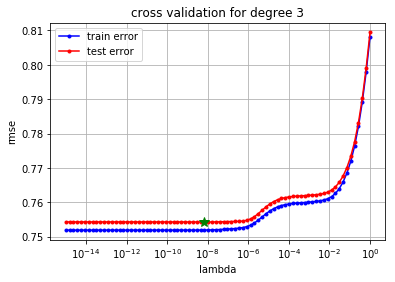

6.846096838574672e-09 0.7543032265717811


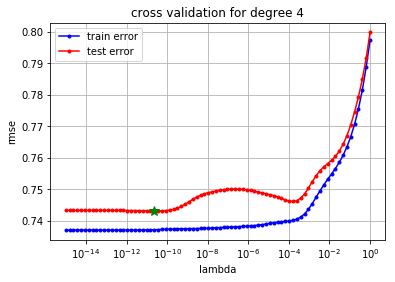

2.3285662984981966e-11 0.7430175475344988


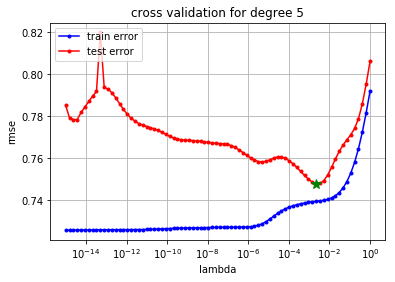

0.0021967070907932353 0.7479176283046222


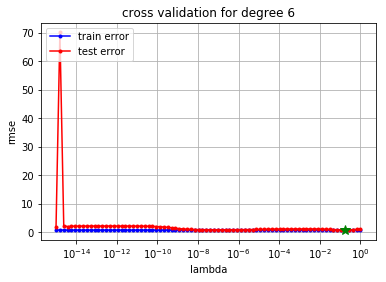

0.17398280529303695 0.7828421872882696
Accuracy:  82.26357871519163
4 2.3285662984981966e-11


In [13]:
#best_degree, best_lambda = best_model_ridge(y, X, 5, np.arange(1,11), np.logspace(-5, 0, 30), seed=56)
y, X, X_mean, X_std, ids, dict_mask_jets_train = process_data2('Data/train.csv', inv_log=True)
best_degrees = []
best_lambdas = []
for i in range(len(dict_mask_jets_train)):
    best_degree, best_lambda = best_model_ridge(y[dict_mask_jets_train[i]], X[dict_mask_jets_train[i]], 5, np.arange(1,7), np.logspace(-15, 0, 80), seed=56)
    best_degrees.append(best_degree)
    best_lambdas.append(best_lambda)
    print(best_degree, best_lambda)

In [16]:
best_weights = []
for i in range(len(dict_mask_jets_train)):
    xi = X[dict_mask_jets_train[i]]
    yi = y[dict_mask_jets_train[i]]
    
    xi = build_poly(xi, best_degrees[i])
    w, _ = imp.ridge_regression(yi, xi, best_lambdas[i])
    best_weights.append(w)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 250000 but corresponding boolean dimension is 568238

In [17]:
_, X, X_mean, X_std, ids, dict_mask_jets_train = process_data2('Data/test.csv', inv_log=True)
y_pred = np.zeros(X.shape[0])
    
for i in range(len(dict_mask_jets_train)):
    xi = X[dict_mask_jets_train[i]]
    xi = build_poly(xi, best_degrees[i])
    y_test_pred = predict_labels(best_weights[i], xi)
    y_pred[dict_mask_jets_train[i]] = y_test_pred
create_csv_submission(ids, y_pred, "prediction_2.csv")

IndexError: list index out of range

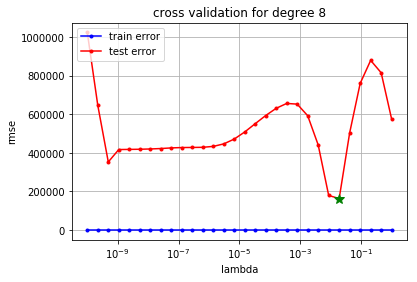

0.018873918221350997 163416.512541823


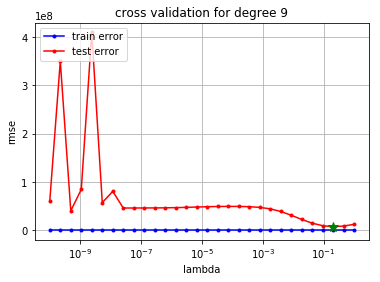

0.2043359717856948 7047868.487886092


KeyboardInterrupt: 

In [14]:
best_degree, best_lambda = best_model_ridge(y, X, 5, np.arange(8,11), np.logspace(-10, 0, 30), seed=56)
best_degree, best_lambda

### 2.5. Logistic regression using gradient descent

IntProgress(value=0, max=30)

Iteration:  0  loss:  138629.43611198905
Iteration:  100  loss:  -13640759374.521212
Iteration:  200  loss:  -27151430001.90783
Iteration:  300  loss:  -40662098609.56017
Iteration:  400  loss:  -54172767015.08769
Iteration:  500  loss:  -67683435352.83234
Iteration:  600  loss:  -81194103536.52234
Iteration:  700  loss:  -94704771629.92374
Iteration:  800  loss:  -108215439692.06824
Iteration:  900  loss:  -121726107734.08939


/home/dap/EPFL2018-2019/Semestre1/ML/ML_Project/implementations.py:19: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*err_mse)


Iteration:  0  loss:  138629.43611198905
Iteration:  100  loss:  -13637754699.306162
Iteration:  200  loss:  -27145521920.635292
Iteration:  300  loss:  -40653286358.586876
Iteration:  400  loss:  -54161050514.761955
Iteration:  500  loss:  -67668814609.53506
Iteration:  600  loss:  -81176578687.04999
Iteration:  700  loss:  -94684342764.22063
Iteration:  800  loss:  -108192106841.36467
Iteration:  900  loss:  -121699870918.50632
Iteration:  0  loss:  138629.43611198905
Iteration:  100  loss:  -13663654123.202269
Iteration:  200  loss:  -27197026117.890617
Iteration:  300  loss:  -40730396322.15412
Iteration:  400  loss:  -54263766342.145615
Iteration:  500  loss:  -67797136248.39716
Iteration:  600  loss:  -81330506109.80228
Iteration:  700  loss:  -94863875959.69043
Iteration:  800  loss:  -108397245808.46773
Iteration:  900  loss:  -121930615656.30789
Iteration:  0  loss:  138629.43611198905
Iteration:  100  loss:  -13788048969.877674
Iteration:  200  loss:  -27445009022.89659
Itera

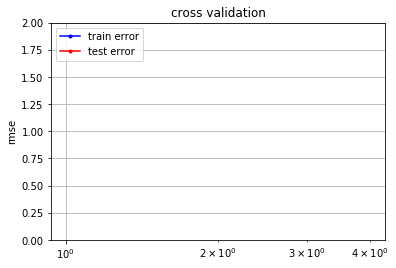

In [10]:
gamma = 0.01
max_iters = 1000
cross_validation_demo(y, X, logistic_regression, initial_w=inital_w, max_iters=max_iters, gamma=gamma)

### 2.6. Regularized logistic regression using gradient descent

In [4]:
gamma = 0.01
max_iters = 500
#best_model_logistic(y, X, 5, np.arange(1,11), np.logspace(-5, 0, 30), max_iters=max_iters, gamma=gamma)
best_model_logistic(y, X, 5, np.arange(1,4), np.logspace(-5, 0, 30), max_iters=max_iters, gamma=gamma)

Iteration:  0  loss:  205032.97380867534


KeyboardInterrupt: 

## 3. Conclusion and choice of the best model